## 목표
- 타이타닉 데이터를 학습해서 생존자/ 사망자를 예측 해보자 -> 이진분류(클래스가 두개 생존자, 사망자)
- 머신러닝 전체 과정을 이해해보자

#### 머신러닝 과정
- 1. 문제정의
- 2. 데이터를 수집해야한다.
- 3. 데이터 전처리(garbage in garbage out) : 데이터를 분석하기에 앞서 깔끔하게 처리하는 것
- 4. 탐색적 데이터 분석 : 내용 확인, 기술 통계량, 상관관계
- 5. 머신러닝 모델 선택(하이퍼 파라미터 조정) 및 학습
- 6. 모델 평가 및 예측
- 7. 모델 서비스

## 데이터 불러오기

In [312]:
# Kaggle 에서 제공한 데이터 다운 받은 상태
# train,test
# train : 훈련용 데이터, test : 테스트용 데이터
# submission : 답안지 형식
# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 시각화
import seaborn as sns  # 그래프 시각화

# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

q1. 타이타닉 train 데이터와 test 데이터를 변수 train, test 저장하기(단, 인덱스는 승객 번호를 사용할 것.)

In [313]:
train = pd.read_csv('./data/train.csv',index_col= 'PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [314]:
test = pd.read_csv('./data/test.csv',index_col= 'PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [315]:
# 크기 확인하기
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [316]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## 데이터 전처리 및 데이터 탐색
#### 결측치 확인

In [317]:
train.columns

# Index(['Survived' : 생존/ 사망 여부, 
        # 'Pclass' : 승객등급 (1~3, 1이 상위층), 
        # 'Name': 이름, 
        # 'Sex' : 성별,
        # 'Age' : 나이 , 
        # 'SibSp' : 형제자매, 배우자수, 
        # 'Parch' : 부모/자식 수 , 
        # 'Ticket' : 티켓 정보,
        # 'Fare' : 요금 정보 , 
        # 'Cabin' : 객실, 
        # 'Embarked' : 승선항(S,C,Q)],
        #   dtype='object')

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [318]:
# train의 정보를 확인해서 결측치가 있는지 확인하는 과정 
train.info()  # 3개컬럼 결측치가 있음(891에 미달하는 친구들이 3개)
            # 데이터 타입이 숫자가 아니면 안돌아감(문자형태 숫자로 바꿔주기)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [319]:
test.info()  # 418에 미달하는 아이들이 3개 정도 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [320]:
# 결측치 개수 확인
train.isnull().sum()  # axis = 0 => 축(행 방향으로 연산) 비어있는 거를 다 더함()
# Age , Cabin , Embarked 컬럼 결측치 有

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [321]:
test.isnull().sum()
# Age, Cabin, Fare 결측치

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [322]:
# train 결측치 존재 및 컬럼당 결측치 개수 확인
# null이 존재하는 컬럼 뽑기
null_col = train.isnull().any()
# any() --> 각 열(행방향)에 True 요소가 하나 이상 포함되어 있는지 여부(기본값)

# Boolean 인덱싱
print(train.columns)  # 전체 칼럼 중
print(train.columns[null_col]) # 결측치가 있는 것만 나오게 해줌

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [323]:
# train 이렇게하면 결측치가 있는 열의 정보만 불러와짐
null_col = train.columns[train.isnull().any()]
train[null_col].isnull()  


,Age,Cabin,Embarked
PassengerId,,,
1,False,True,False
2,False,False,False
3,False,True,False
4,False,False,False
5,False,True,False
...,...,...,...
887,False,True,False
888,False,False,False
889,True,True,False


In [324]:
# test
null_col = test.columns[test.isnull().any()]
test[null_col].isnull()  

,Age,Fare,Cabin
PassengerId,,,
892,False,False,True
893,False,False,True
894,False,False,True
895,False,False,True
896,False,False,True
...,...,...,...
1305,True,False,True
1306,False,False,False
1307,False,False,True


#### 위에서 train 결측치 찾은 열인 --> Embarked 컬럼 결측치 채우기

In [325]:
# 단순하게 최빈값, 평균값, 중앙값 기술 통계량으로 채워버림
# 특성의 상관관계를 확인하고 그걸 기반으로 기술 통계량 확ㅇ니 후 채움
# 실제 데이터를 찾기위해서 인터넷 상에서 조사
# train의 Embarked 결측치 행 확인하기
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [326]:
# train 데이터 기준으로 데이터 살피기
# 학습에 도움이 되는 데이터가 ⭐⭐⭐train
# train 데이터 기준으로 결측치 처리해야함
train['Embarked'].value_counts()  # S로 많이 탔음

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [327]:
# 결측치 존재하는 모든 행에 'S'로 채우기
# 결측치가 있다면 해당 value 값으로 채워라! -> fillna()
train['Embarked']= train['Embarked'].fillna('S')

In [328]:
#위에서는 있었던 결측치가 채워져서 지금 행이 출력이 안되고 있음
train[train['Embarked'].isnull()] # 처리 확인용

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


#### test-Fare 채우기

In [329]:
# 요금 컬럼 기술 통계량 확인해보기
# 머신러닝은 train을 기준으로 배우기 때문에 train을 보고 결측치를 채우는 것을 판단하면 된다.
train['Fare'].describe()
# 평균과 중앙값중에 요금 데이터의 대표성을 가지고 있는 건 중앙 값이라고 판단
# median

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [330]:
# 생존/사망에 영향을 줬을 것 같은 다른 컬럼 확인해보기
# 상관관계 확인
# -1 ~ 1 : -1,1에 가까울 수록 상관관계가 높음
# 0 : 비교적 상관관계가 낮다
# abs()-> 절대값으로 불러오기
# sort_values(ascending=False) 내림차순 정렬
train.corr()['Survived'].abs().sort_values(ascending=False)
# Pclass 컬럼이 비교적 상관관계가 높음을 확인

# 상관관계는 수치 값으로 이루어진 컬럼에 대해서만 적용하고 그에 대한 것만 결과를 출력해줌!
# info()확인 해보면 알 수 있음 (int형만 지금 상관관계가 계산 되어짐) --> 그래서 아래서 문자열 형태로 되어있는 컬럼도 연관을 시켜봄

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

<Axes: >

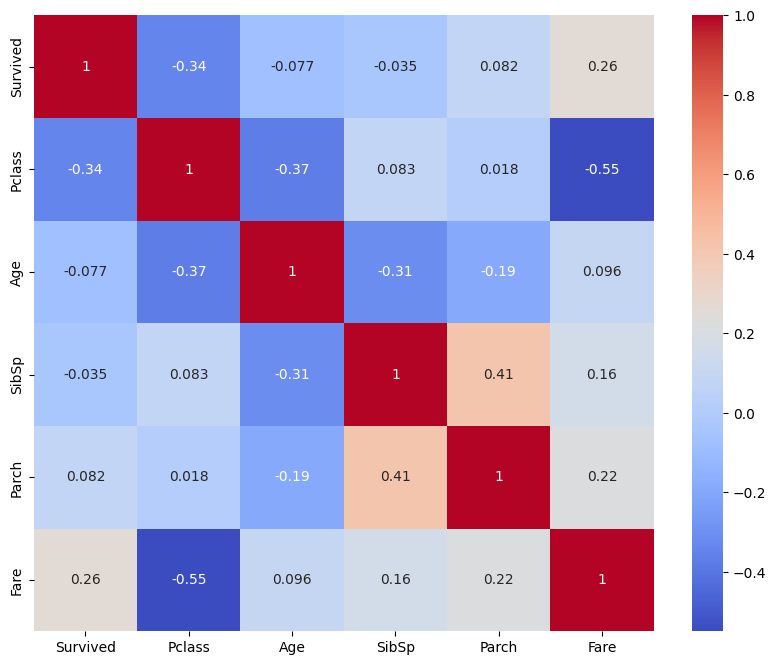

In [331]:
# 상관관계 시각화 >> 히트맵 그래프 그려보기
plt.figure(figsize=(10,8))
# sns.heatmap(train.corr(), annot = True =>  상관관계 계수값 출력, cmap = 'coolwarm' => 색 설정도 가능)
sns.heatmap(train.corr(), annot = True , cmap = 'coolwarm' )

In [332]:
# 문자열 형태로 되어있는 컬럼도 연관을 시켜보자!
# 성별 데이터를 한번 연관 시켜보자!
# Pclass, Sex, Fare

# 1- 여성 요금 중앙값
# 1- 남성 요금 중앙값
# groupby(기준)--> 같은것 끼리 묶어주기
# 승객의 등급 성별,요금 중에서 등급, 성별을 묶어서 평균값을 확인함
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [333]:
# 결측치 맞게 채워주기
test ['Fare'] = test['Fare'].fillna(7.92500)
test.info() # 잘 채워진 것을 확인 할 수 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Age 결측치 채우기
- 단순 기술 통계치로 채우지 않고 다른 컬럼과의 상관관게를 이용하여 결측치를 채워보자.
- 생존/사망과 상관이 높은 컬럼 : Pclass
- 범주형 데이터 중에서도 생존/사망 어느정도 영향을 주는 컬럼 : Sex

In [334]:
# 승객의 등급, 성별을 묶어서 나이의 평균값을 확인
# 승객의 등급 성별, 나이 중에서 등급, 성별을 묶어서 평균값을 확인함
gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [335]:
# Pclass가 3등급이고, male인 사람의 나이 평균 접근해보기
# 중복 인덱스, 멀티 인덱스를 사용
gb1.loc[(3,'male')]

# Pclass 1등급이고 female 접근하기
gb1.loc[(1,'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [336]:
# train Age 결측치 행 확인
train[train['Age'].isnull()]

# test Age 결측치 행 확인
test[test['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [337]:
# np.isnan=> null인지 확인하는 함수
a = np.array([1,2,np.nan])
np.isnan(a)
pd.isnull(a)
a

array([ 1.,  2., nan])

In [338]:

# pd.apply() : 사용자가 정의한 복잡한 기능을 하는 함수를 판다스 객체에 적용할때 사용하는 함수
def test_print(data) : 
    print(data["Age"])
# axis = 0 은 행방향으로 확인 / axis = 1은 열 방향으로 확인
train[['Pclass','Age']].apply(test_print,axis = 1)


22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

PassengerId
1      None
2      None
3      None
4      None
5      None
       ... 
887    None
888    None
889    None
890    None
891    None
Length: 891, dtype: object

In [339]:
# 나이 결측치 채워주는 자동화 코드 생성하기!!! 
def fill_age(row) : 
    # 만약에 나이가 결측치라면 gb1에서 나이 평균값 가져와서 반환하기
    # 1인 데이터를 확인하려면 행단위 처리, 열방향으로 데이터 확인
    if np.isnan(row['Age']):
        age = gb1.loc[(row['Pclass'],row['Sex'])]
        return age
    # 결측치가 아니라면 원래 나이 값을 반환하기
    else : 
        return row['Age']

In [340]:
# train age 결측치 채우기
train['Age'] = train.apply(fill_age,axis = 1).astype('int64')
# train['Age'].isnull().sum()
train['Age'].isnull().sum() # 결측치 x, 처리 완료

0

In [341]:
# test age 결측치 채우기
test['Age'] = test.apply(fill_age,axis = 1).astype('int64')

test['Age'].isnull().sum()  # 결측치 잘 채워졌는지 확인하기

0

#### Cabin 결측치 채우기

In [342]:
# 요소 데이터 확인해보기
train['Cabin'].unique()

# nan 값을 임의의 알파벳으로 채우기 => 'M'
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [343]:
# 알파벳만 추출하기, 문제열의 인덱스 번호 0번째
train['Deck']= train['Deck'].str[0]  # 0번째 알파벳만 뺌
test['Deck'] = test['Deck'].str[0]

In [344]:
# Cabin컬럼은 삭제 train, test 동일하게 적용 !
# drop(컬럼명.axix = 1)
train.drop('Cabin',axis = 1,inplace = True)  
#요걸 실행을 시켜주려면 train변수에 담거나 inplace = True로 해주면 바로 반영이된다


In [345]:
train.info() # 11개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [346]:
test.drop('Cabin',axis = 1,inplace = True)

In [347]:
test.info()# 10개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


데이터 탐색
- train 데이터를 이용해 탐색함
- test를 탐색하는 것은 모델의 일반화에 도움이 되지 않기 때문에 탐색하지 않는다.

2023.04.14

#### 범주형 데이터 살펴보기
##### Deck 시각화

In [348]:
# M에 대한 의미를 살펴보자
# Deck 기준으로 생존/사망한 사람 숫자 세어보기 => groupby
train_deck = train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()
train_deck
#0사망 ,1생존
# M이라는 사망한 사람도 많고, 생존한 사람도 많지만 상대적으로 사망한 사람이 더 많음
# M이라는 값은 생존/ 사망 나름대로 영향을 주지 않을까?

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

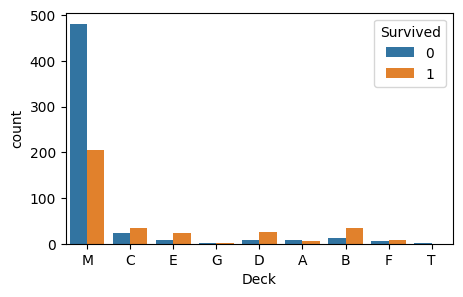

In [349]:
plt.figure(figsize= (5,3))
sns.countplot(data = train ,x = 'Deck', hue = 'Survived')
plt.show()

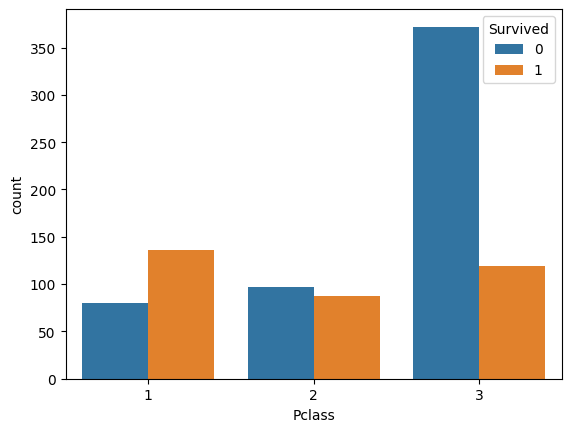

In [350]:
# Pclass 시각화
sns.countplot(data = train, x = 'Pclass' , hue = 'Survived')
plt.show()

# 그래프 해석
# 3등급 하위계층 사람들이 많이 사망함

##### Deck과 Pclass 시각화

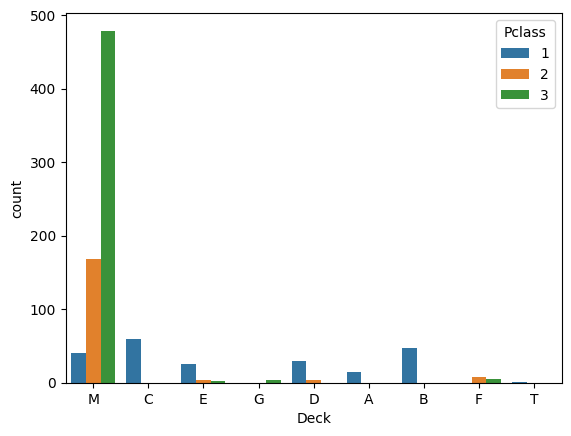

In [351]:
sns.countplot(data = train, x= 'Deck' ,hue = 'Pclass')
plt.show()


In [352]:
# 그래프 해석
# M에 대한 의미를 살펴보니
# 3등급의 사람들이 많이 포함되엉 있어서 사망률이 높았음을 알 수 있음
# M자체에는 생존/사망 결정하는 큰 요소가 없음(되지 않음)
# M에 대한 의미를 더 파악해볼 필요가 없을듯 하다 전처리X

q2. 성별에 따른 생존, 사망 시각화 // 승선항에 따른 생존 사망 시각화

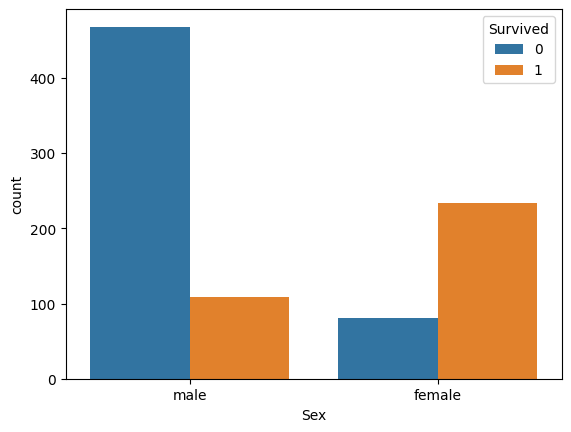

In [353]:
# countplot 사용해보기
sns.countplot( data = train,x ='Sex' , hue ='Survived')
plt.show()

# 그래프 해석 (0이 사망 1이 생존)
# 여성은 상대적으로 생존 비율이 높음
# 남성은 상대적으로 사망 비율이 높음

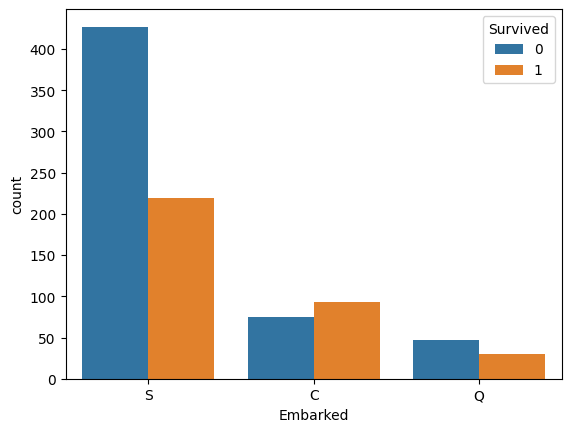

In [354]:
sns.countplot( data = train,x ='Embarked' , hue ='Survived')
plt.show()

#S라는 배에서 사람들이 상대적으로 사람들이 많이 죽었다. 라는 것을 알 수 있음

#### 수치형 데이터 살펴보기
##### Age 시각화 - 성별 데이터도 생존/ 사망 확인

(0.0, 85.0)

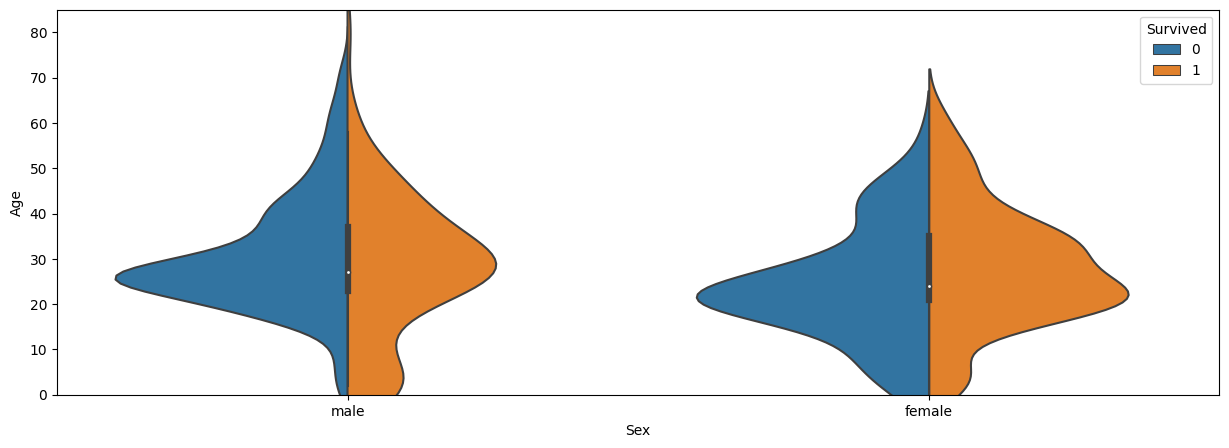

In [355]:
# violinplot() : 바이올린 모양과 비슷, 데이터의 분포를 확인할때 사용하는 그래프
# y축에 age, x sex, 분포되는 값은 survived
plt.figure(figsize=(15,5 ))
sns.violinplot(data = train , x = 'Sex',y = 'Age' , hue = 'Survived', split = True)
plt.ylim (0,85) #y축 범위 제한 -> 0부터 85까지 볼꺼다 그거 제한 해줌

# 남성의 파란색이 넓게 퍼지고 있으니까 사망률이 높다는 것을 알 수 있음
# 여성의 그래프를 보면 오렌지 색이 더 많고 20대에서 40대까지 살아내려고 노력했구나

In [356]:
# 어린아이들의 생존률은?
# 상대적으로 남자아이가 여자 아이에 비해서 많이 살았음

##### Fare 시각화

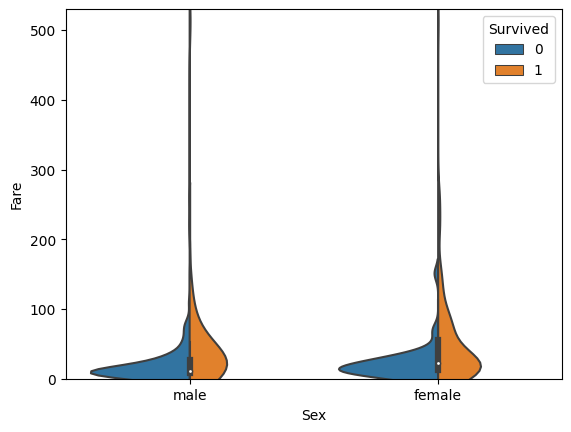

In [357]:
# 요금별 사망자수/생존자수
sns.violinplot(data = train , x = 'Sex', y ='Fare', hue ='Survived' , split  = True)

plt.ylim(0,530)
plt.show()
# 요금이 낮은 사람은 상대적으로 많이 사망함

#### Parch, Sibsp - 부모자식, 형제 배우자수
- 특성공학 : 가족의 수라는 컬럼 생성 (Parch + Sibsp +1)
- train에 적용했으면 test에도 적용함!!

In [358]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

In [359]:
train['Family_size'] = train['Parch'] + train['SibSp']+1
test['Family_size'] = test['Parch'] + test['SibSp']+1

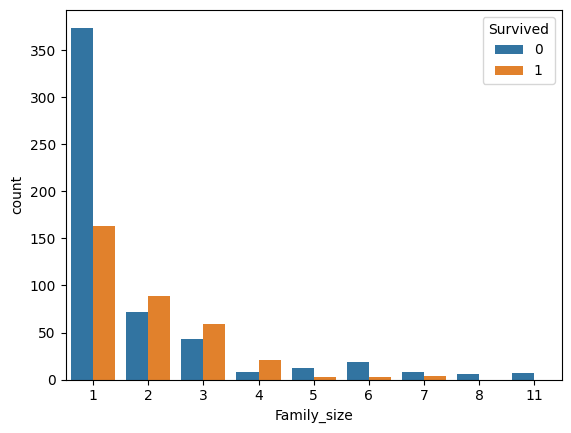

In [360]:
# 시각화 연결하기
# 가족의 수에 따른 생존/ 사망 확인
train['Family_size'].unique()
sns.countplot(data = train , x = 'Family_size' , hue = 'Survived')
plt.show()

In [361]:
# 3개의 범주로 좁힐 수 있음!
# 같은 의미를 내포한다면 범위(카테고리)를 줄여보자 => binning(사소한 관찰의 오류를 줄일 수 있다.)
# 1명일때는 사망비율이 높음, 2~4 일대는 생존비율이 높음, 5명~ 일떄는 사망비율이 높음

In [362]:
# pd.cut : 카테고리(범주)형식으로 데이터 정리할때 사용하는 기능
# 데이터 구간화
# Alone, Small, Large 3개 범주(구간) 설정
bins = [0, 1, 4, 11]  # 앞에있는 숫자 값을 포함 x , 뒤에 있는 숫자값을 포함 o
labels  = ['Alone' ,'Small' ,'Large']
train['Family_group'] = pd.cut(train['Family_size'], bins =bins , labels = labels)
test['Family_group'] = pd.cut(test['Family_size'], bins =bins , labels = labels)



In [363]:
train['Family_group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

['Small', 'Alone', 'Large']
Categories (3, object): ['Alone' < 'Small' < 'Large']


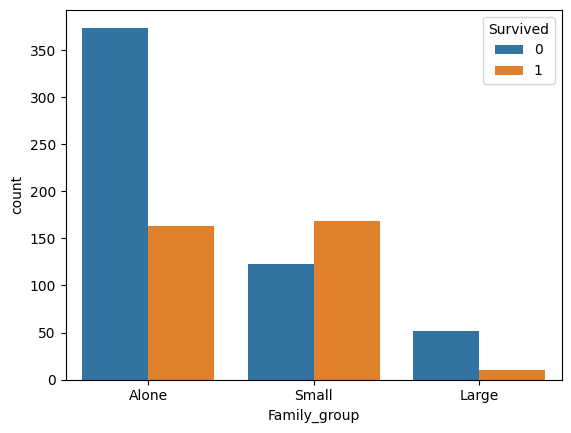

In [364]:
print(train['Family_group'].unique())
sns.countplot(data = train , x = 'Family_group' , hue = 'Survived')
plt.show()

#### Text 데이터 다루기
##### 중간 호칭 추출해보기

In [365]:
# 이름 컬럼 접근해서 내용확인해보기
# train 기준으로 탐색 
# 호칭 접근 해보기
# 문자열 관련 함수split() => 곡백을 기준으로 문자열 분리
# strip () => 문자 앞뒤로 공백을 제고하는 함수
# lstrip() => 문장 왼쪽(처음) 공백 제거하는 함수
# rstrip() => 문장 오른쪽(끝) 공백 제거하는 함수
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [366]:
# 호칭 추출하는 함수 정의(사용자 정의함수)
def split_title(row) :
    return row.split(',')[1].split('.')[0].strip()

# apply 
# 데이터 1차원이라서 axis 설정 안해도된다 > 방향적용 필요x
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [367]:
# Train 카테고리 중복 없이 확인해보기
train['Title'].unique().size
train['Title'].unique()

# Mr 미스터 : 남성, 결혼 유무 상관 없음
# Master 마스터 : 결혼하지 않음 남성, 주로 청소년 이하 
# Ms 미즈 : 여성 결혼하지 않음, 상관없음
# Miss 미스 : 결혼을 하지 않은 여성
# Mrs 미시즈 : 결혼한 여성
# Don : 기부자
# Rev : 목사님
# Dr : 의사 or 박사

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

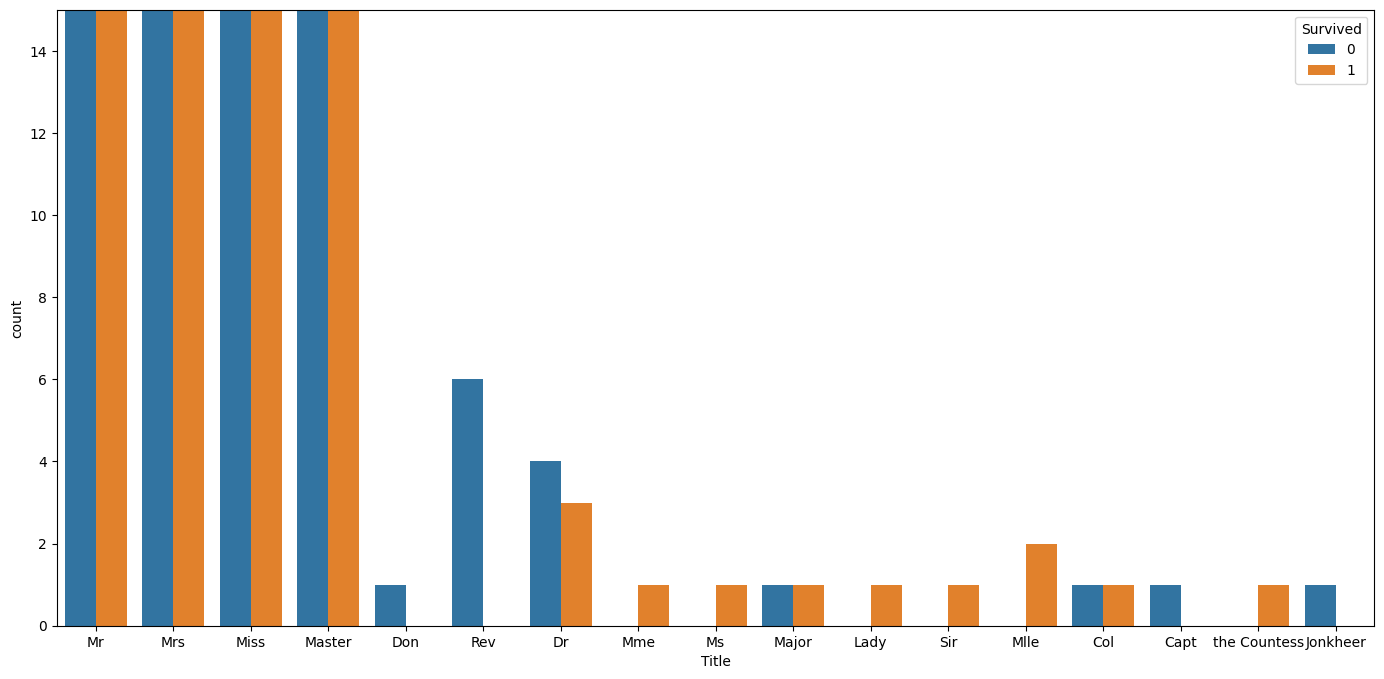

In [368]:
# 호칭에 따른 생존/ 사망 그래프 시각화
plt.figure(figsize=(17,8))
sns.countplot(data = train , x = 'Title', hue = 'Survived')
plt.ylim(0,15)
plt.show()

In [369]:
# Mr,Mrs, Miss , Master, Rev, Other(앞의 5개를 제외한 나머지)
title = ['Mr', 'Mrs', 'Miss', 'Master','Rev','Don','Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
        'Jonkheer']
len(title)
cvt_title = ['Mr', 'Mrs', 'Miss', 'Master','Rev'] +['Other']*12
len(cvt_title)

17

train

In [370]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [371]:
# dict
title_dict = dict(zip(title,cvt_title))
train['Title'].map(title_dict).unique()  # 주요한 것이 아닌 것들은 모두 Other로 담김
train['Title'] = train['Title'].map(title_dict)  # 주요한 것이 아닌 것들은 모두 Other로 담김

test

In [372]:
# title 데이터 확인
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [373]:
# test데이터에 있는 Dona를 추가 해줌, title_dict 추가
title_dict['Dona'] = 'Other'
title_dict['Dona']

'Other'

In [374]:
test['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [375]:
# test - Titel 정리해보기!
test['Title'] = test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

#### 불필요한 컬럼 삭제
- drop 버리기!
- 전처리에서 제외된 컬럼과 특성공학 후 불필요해진 컬럼 삭제

In [376]:
train.columns  # Name, Family_size, Ticket 삭제 해보기

test.drop(['Name','Family_size','Ticket'],axis = 1,inplace = True)

In [377]:
# 삭제 후 train 데이터 반영해보기
train.drop(['Name','Family_size','Ticket'],axis = 1,inplace = True)
test.drop(['Name','Family_size','Ticket'],axis = 1,inplace = True)

KeyError: "['Name', 'Family_size', 'Ticket'] not found in axis"

In [378]:
# train, test info() 확인해보기
print(train.info()) # 891,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_group  891 non-null    category
 10  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 109.9+ KB
None


In [379]:
print(test.info()) # 418,10

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_group  418 non-null    category
 9   Title         418 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 33.2+ KB
None


#### 문제, 답 데이터 분리

In [380]:

X_train = train.loc[ : ,'Pclass' : 'Title'] # 생존 사망 여부를 제외한 나머지 컬럼 
y_train = train.loc[ : ,'Survived'] # 생존 사망 여부 컬럼 1개
X_test = test


In [381]:
X_train = train.drop('Survived',axis = 1) # 생존 사망 여부를 제외한 나머지 컬럼 
y_train = train['Survived'] # 생존 사망 여부 컬럼 1개
X_test = test

In [382]:
print(X_train.shape , y_train.shape)
print(X_test.shape) # y_test:kaggle이 알고 있음

(891, 10) (891,)
(418, 10)


#### 특성 선택 인코딩
- 범주형 데이터 이코딩
- 전체 컬럼 모두 활용해서 학습으로 연결

In [383]:
# 인코딩해야하는 컬럼 찾기
# X_train.info()
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]
cat_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_group', 'Title'], dtype='object')

In [ ]:
# prefix -> 접두사 붙혀주는친구
pd.get_dummies(X_train['Sex'] , prefix='Sex')

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [384]:
# X_train 원핫 인코딩
for cat_name in cat_choice :
    # 컬럼 1개 인코딩
    dummy = pd.get_dummies(X_train[cat_name] , prefix=cat_name)
    # 기존 X_train 추가(병합, concat)
    X_train = pd.concat([X_train,dummy ], axis = 1)
    # 기존의 인코딩 되지 않은 컬럼 X_train 삭제해보기
    X_train.drop(cat_name, axis = 1 ,inplace = True)


In [385]:
X_train.info() # 891, 28

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   Fare                891 non-null    float64
 5   Sex_female          891 non-null    uint8  
 6   Sex_male            891 non-null    uint8  
 7   Embarked_C          891 non-null    uint8  
 8   Embarked_Q          891 non-null    uint8  
 9   Embarked_S          891 non-null    uint8  
 10  Deck_A              891 non-null    uint8  
 11  Deck_B              891 non-null    uint8  
 12  Deck_C              891 non-null    uint8  
 13  Deck_D              891 non-null    uint8  
 14  Deck_E              891 non-null    uint8  
 15  Deck_F              891 non-null    uint8  
 16  Deck_G  

In [386]:
# X_test 원핫 인코딩
for cat_name in cat_choice :
    # 컬럼 1개 인코딩
    dummy = pd.get_dummies(X_test[cat_name] , prefix=cat_name)
    # 기존 X_train 추가(병합, concat)
    X_test = pd.concat([X_test,dummy ], axis = 1)
    # 기존의 인코딩 되지 않은 컬럼 X_train 삭제해보기
    X_test.drop(cat_name, axis = 1 ,inplace = True)

In [387]:
X_test.info() # 418, 27 >> 컬럼이 왜 1개가 부족할까(원핫 인코딩 할때 하나가 사라졌을꺼다)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Sex_female          418 non-null    uint8  
 6   Sex_male            418 non-null    uint8  
 7   Embarked_C          418 non-null    uint8  
 8   Embarked_Q          418 non-null    uint8  
 9   Embarked_S          418 non-null    uint8  
 10  Deck_A              418 non-null    uint8  
 11  Deck_B              418 non-null    uint8  
 12  Deck_C              418 non-null    uint8  
 13  Deck_D              418 non-null    uint8  
 14  Deck_E              418 non-null    uint8  
 15  Deck_F              418 non-null    uint8  
 16  Deck_

#### 특성 개수 맞추기
- set : 집합 자료형
- 중복 허용 x , 순서 x
- 중복을 허용하지 않는 set의 특징 덕분에 종종 데이터의 중복을 제거하기 위한 필터 역할로 사용됨
- set 활용하다가 정렬, 인덱스 접근으로 활용하고 싶으면 tuple,list형으로 변환해서 사용

In [389]:
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [395]:
# Deck_T컬럼 X_test에 추가하기
X_test['Deck_T'] = 0

In [396]:
#X_train컬럼 순서에 X_test순서도 맞추
X_test = X_test[X_train.columns]
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

#### 모델 선택 및 학습

In [409]:
from sklearn.tree import DecisionTreeClassifier # tree 분류
from sklearn.model_selection import cross_val_score # 교차 검증 도구

##### tree model1

In [397]:
tree_model = DecisionTreeClassifier() # 객체 생성
# 학습
tree_model.fit(X_train,y_train) # 지도학습 => 분류
# 예측
pre = tree_model.predict(X_test)

In [424]:
# 평가 진행 > y_test는 Kaggle에 올려보기
result = pd.read_csv('./data/gender_submission.csv')
result['Survived'] = pre
# csv형식으로 파일 저장

result.to_csv('sjy_submission01.csv' , index=False) #  index=False 인덱스는 저장하지 않겠다

In [ ]:
# 모델의 성능이 생각보다 떨어짐
# 1. 데이터적인 측면에서 노력 > 데이터 수정 (전처리), 데이터 수집, 데이터 탐색
# 2. 모델 측면에서 노력 > 하이퍼 파라미터 제어(튜닝)


#### Tree model - 하이퍼 파라미터 조정

In [414]:
tree_model2 = DecisionTreeClassifier(max_depth= 5)
# 교차 검증 -> 모델 객체 생성하고 어느정도의 성능을 내는 모델인지 확인할 때 사용
cross_result = cross_val_score(tree_model2, X_train,y_train,cv= 5 ) # cv  = 5 5번 정도 교차검증 진행하겠다.
print(cross_result)
print(cross_result.mean())

[0.79888268 0.80337079 0.83146067 0.76966292 0.85393258]
0.8114619295712762


In [418]:
# for문으로 max_depth 값 확인 후 정하기
for md in range (1,10) :  # 교차검증한 평균 9개 출력해보기
    tree_model2 = DecisionTreeClassifier(max_depth= md)
    cross_result = cross_val_score(tree_model2,X_train,y_train,cv = 5).mean()  # 5번 교차검증한 평균
    print(f'{md} : {cross_result}')

1 : 0.7788964911179461
2 : 0.7834285355596007
3 : 0.8159249262444291
4 : 0.8204067541271736
5 : 0.8114619295712762
6 : 0.8091770761408574
7 : 0.799114933149206
8 : 0.7979850605737242
9 : 0.7991023790094783


In [428]:
# 4라고 설정하고 모델 설정, 학습, 예측, 답안지 저장 > kaggle 업로드!
tree_model2 = DecisionTreeClassifier(max_depth= 4)
# 학습
tree_model2.fit(X_train,y_train) # 지도학습 => 분류
# 예측
pre = tree_model2.predict(X_test)

result2 = pd.read_csv('./data/gender_submission.csv')
result2['Survived'] = pre
# csv형식으로 파일 저장
+-
result.to_csv('sjy_submission01.csv' , index=False)


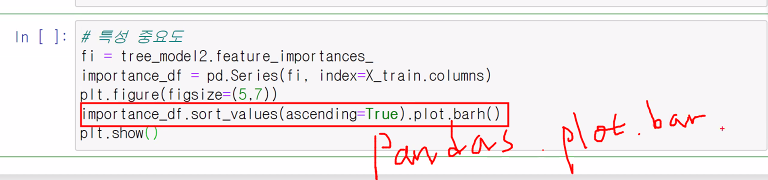

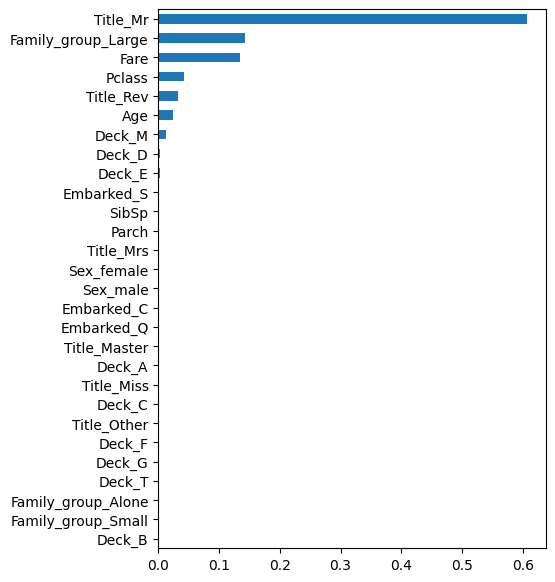

In [429]:
fi = tree_model2.feature_importances_
importance_df = pd.Series(fi, index = X_train.columns)
plt.figure(figsize=(5,7))
importance_df.sort_values(ascending=True).plot.barh()
plt.show()